### Work division
#### The work for this notebook is done and compiled by Nemish Murawat.

### Libraries Required

In [1]:
# Import Requirements
import pandas as pd
from tqdm import tqdm as tq
import numpy as np
import matplotlib.pyplot as plt
from pre_processing_posts import pre_processing_posts as pre_posts
import datetime
import scipy.stats as stats
import random

#### [RQ8.1] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

##### Approach: Step-1
>#####    - To estimate the relationship between number of comments and number of likes for all the posts I use posts dataset.
>#####    - I read the posts data in chunks of size=1000000 and get the columns 'numbr_likes','number_comments'
>#####    - I drop the NaN values in the rows for the different chunks
>#####    - I concatenate the modified chunks and store them in numpy array(likes_comment)



In [2]:
for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',sep='\t',usecols=['numbr_likes','number_comments'],
                                       chunksize=1000000,keep_default_na=True,na_values=' ',engine='c'))):
    chunk=chunk.dropna()
    likes_comment=np.concatenate([likes_comment,chunk.values],axis=0) if i!=0 else chunk.values
   

43it [03:52,  5.41s/it]


##### Approach: Step-2
>#####    - I plot a scatter plot between likes v/s comments for all the posts to see the nature of the relationship between Likes and comments
>#####    - I also calculate the spearman's correlation between two variables (likes and comments)

In [4]:
coef_likes_comment=stats.spearmanr(likes_comment[:,0],likes_comment[:,1])
print(coef_likes_comment)

SpearmanrResult(correlation=0.6652385972821576, pvalue=0.0)


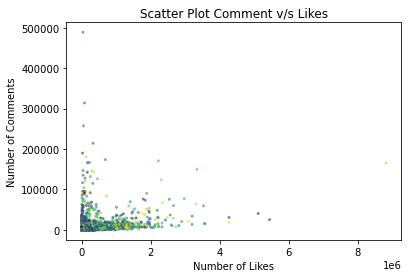

In [3]:
colors=np.random.rand(len(likes_comment))
plt.scatter(likes_comment[:,0],likes_comment[:,1],s=[4]*len(likes_comment),alpha=0.5,c=colors)
plt.xlabel('Number of Likes')
plt.ylabel('Number of Comments')
plt.title('Scatter Plot Comment v/s Likes')
plt.show()


### Comments:

>#### Through Spearman's calculation it's quite evident that they are correlated(p=0,null hypothesis get's rejected) with correlation =0.66

>#### So yeah more likes means more comments.



#### RQ8.2 Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

##### Approach: Step-1
>#####    - To estimate the relationship between time of posting and number of likes(or comments) for all the posts I use posts dataset.
>#####    - I read the posts data in chunks of size=1000000 and get the columns 'cts','numbr_likes','number_comments'
>#####    - I drop the NaN values in the rows for the different chunks
>#####    - I concatenate the modified chunks and store them in numpy array(x)




In [3]:

for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',sep='\t',usecols=['cts','numbr_likes','number_comments'],
                                       chunksize=1000000,keep_default_na=True,na_values=' ',engine='c'))):
    chunk=pre_posts(chunk)
    chunk=chunk.dropna()
    x=np.concatenate([x,chunk.values],axis=0) if i!=0 else chunk.values


43it [07:20, 10.25s/it]


##### Approach: Step-2
>#####    - In this I store the respective values in of time,likes and comment in the different variable.

In [8]:

time=x[:,0].copy()
likes=x[:,1].copy()
comment=x[:,2].copy()

##### Approach: Step-3
>#####    - In this step since I want to find statistical relation between time v/s likes(or comments) I read the datetime objects of the time stamp and get the hour of the post.
>#####    -  I define a function time_hour which converts all the stored datetime objects to hours(int64)

In [5]:

def time_hour(time):
    y=[]
    for i in tq(time):
        try:
            y.append(i.hour)
        except:
            i=pd.DatetimeIndex([i])
            y.append(i.hour[0])
    return y

##### Approach: Step-4
>#####    - In this step since I want to find statistical relation between time v/s likes(or comments) I read the datetime objects of the time stamp and get the minutes with respect to 24 hours(24 * 60 minutes) in a day
>#####    -  I define a function time_minute which converts all the stored datetime objects to minutes(int64).
>#####    - So the objective is to compare the realation between time v/s likes(or comments) on two scale

In [6]:
def time_minute(time):
    y=[]
    for i in tq(time):
        try:
            y.append(i.hour*60+i.minute)
        except:
            i=pd.DatetimeIndex([i])
            y.append(i.hour[0]*60+i.minute[0])
    return y

##### Approach: Step-5
>#####    -Since now all the two variable are numerical,I use Spearman correlation to get correlation and p-value for time in hour v/s Likes

In [11]:
y_hour=time_hour(time)
coef=stats.spearmanr(y_hour,likes)
print(coef)

100%|██████████| 42706865/42706865 [01:54<00:00, 374115.83it/s] 


SpearmanrResult(correlation=0.015954613088348283, pvalue=0.0)


#### Comments:
>#### We can get p-value=0.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### The correlation is 0.015 which is small. 

##### Approach: Step-6
>#####    -Since now all the two variable are numerical,I can use Spearman correlation to get correlation and p-value for time in hour v/s Comments

In [12]:
y_hour=time_hour(time)
coef=stats.spearmanr(y_hour,comment)
print(coef)

100%|██████████| 42706865/42706865 [01:51<00:00, 382227.02it/s] 


SpearmanrResult(correlation=0.008855948260031634, pvalue=0.0)


#### Comments:
>#### We can get p-value=0.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### The correlation is 0.008 which is small. 

##### Approach: Step-7
>#####    -Since now all the two variable are numerical,I can use Spearman correlation to get correlation and p-value for time in minute v/s Likes

In [9]:
y_minute=time_minute(time)
coef_likes_minute=stats.spearmanr(y_minute,likes)
print(coef_likes_minute)

100%|██████████| 42706865/42706865 [02:44<00:00, 259099.86it/s] 


SpearmanrResult(correlation=0.01563381106999236, pvalue=0.0)


#### Comments:
>#### We can get p-value=0.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### The correlation is 0.015 which is small(which is kind of same with time in hours)

##### Approach: Step-8
>#####    -Since now all the two variable are numerical,I can use Spearman correlation to get correlation and p-value for time in minute v/s Number of Comments

In [10]:
y_minute=time_minute(time)
coef_comment_minute=stats.spearmanr(y_minute,comment)
print(coef_comment_minute)

100%|██████████| 42706865/42706865 [02:44<00:00, 259887.04it/s] 


SpearmanrResult(correlation=0.008660595562157732, pvalue=0.0)


#### Comments:
>#### We can get p-value=0.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### The correlation is 0.008 which is small(kind of same as time in hours)

##### Approach: Step-9
>#####    -As we see before, we find that the time v/s likes(or comments) are correlated(but with small value of correlation). I aim to find more stronger correlation.
>#####    -Hence instead of directly finding correlation for all the posts likes/ comments I refine my likes variable by calculating count of likes in a given intervals of the hours in day.
>#####    - My time intervals are each hours of the day(12am-1am,1am-2am......) and I normalised the count of the interval using the total count of likes.
>#####    - I plot a line plot Time v/s Normalised Likes to get a better representation of the relationship.

100%|██████████| 42706865/42706865 [01:50<00:00, 385258.33it/s] 
24it [01:09,  2.90s/it]


SpearmanrResult(correlation=0.7817391304347826, pvalue=6.454527225791052e-06)


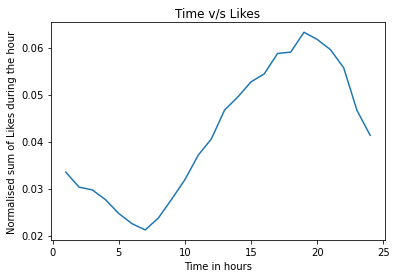

In [12]:
hist_hour=np.arange(0,24)
y_hour=time_hour(time)
for i,j in tq(enumerate(hist_hour)):
    hist_hour[i]=sum(likes[np.array(y_hour)==i])
coef=stats.spearmanr(np.arange(1,25),hist_hour/sum(hist_hour))
plt.plot(np.arange(1,25),hist_hour/sum(hist_hour))
plt.xlabel('Time in hours')
plt.ylabel('Normalised sum of Likes during the hour')
plt.title('Time v/s Likes')
print(coef)

#### Comments:
>#### We can get p-value=6.45e-6.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### In this way we get a very high correlation of 0.78 as compared to previous counterparts.(Stronger relationship)

##### Approach: Step-10
>#####    -As we see before, we find that the time v/s comments are correlated(but with small value of correlation). I aim to find more stronger correlation.
>#####    -Hence instead of directly finding correlation for all the posts comments I refine my comments variable by calculating count of comments in a given intervals of the hours in day.
>#####    - My time intervals are each hour of the day(12am-1am,1am-2am......) and I normalised the count of the interval using the total count of comments

24it [01:09,  2.88s/it]

SpearmanrResult(correlation=0.7852173913043478, pvalue=5.504827399386528e-06)


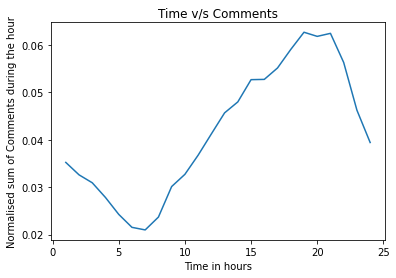

In [13]:
hist_hour=np.arange(0,24)
for i,j in tq(enumerate(hist_hour)):
    hist_hour[i]=sum(comment[np.array(y_hour)==i])
coef=stats.spearmanr(np.arange(1,25),hist_hour/sum(hist_hour))
plt.plot(np.arange(1,25),hist_hour/sum(hist_hour))
plt.xlabel('Time in hours')
plt.ylabel('Normalised sum of Comments during the hour')
plt.title('Time v/s Comments')
print(coef)

#### Comments:
>#### We can get p-value=6.45e-6.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### In this way we get a very high correlation of 0.78 as compared to previous counterparts.(Stronger relationship) which is close to the relationship v/s 


#### RQ-8.3 What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

##### Approach: Step-1
>#####    - To get the values for Number of followers of all the user I use profiles dataset to get the required values.  
>#####    - I read the profiles data in chunks of size=1000000 and get the columns 'followers'
>#####    - I drop the NaN values in the rows for the different chunks
>#####    - I concatenate the modified chunks and store them in df_followers dataframe.


>#####    -Note:Maybe it's not the best read the data in chunks here.



In [4]:
for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_profiles.csv',sep='\t',usecols=['followers'],
                                       chunksize=1000000,keep_default_na=True,na_values=' ',engine='c'))):
    chunk=chunk.dropna()
    df_followers=pd.concat([df_followers,chunk],axis=0) if i!=0 else chunk

5it [02:49, 33.99s/it]


##### Approach: Step-2
>#####    - From the obtained df_followers, I sort the dataframe in ascending order using followers column
>#####    - Now I only take those users which have more than one 0 followers
>#####    - To calculate the mean,25% quantile,50% quantile,75% quantile,of the followers I used dataframe.describe() method
>#####    - To calculate the mode of the followers I used dataframe.mode() method
>#####    - I plot a histogram of number of followers with num_nbins=100



The Mean of the distribution is 4770.453940295966
The Mode of the distribution is 1
The 25% quantile of the distribution is 163.0
The 50% quantile of the distribution is 410.0
The 75% quantile of the distribution is 980.0


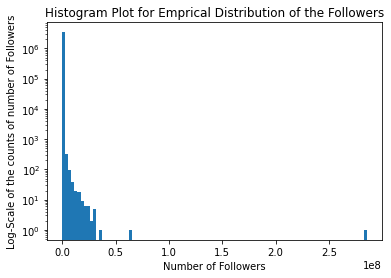

In [7]:
df_followers.sort_values(by='followers',ascending=True)
df_followers=df_followers[df_followers['followers']>0]
plt.hist(df_followers['followers'].values,bins=100,log=True)
plt.xlabel('Number of Followers')
plt.ylabel('Log-Scale of the counts of number of Followers')
plt.title('Histogram Plot for Emprical Distribution of the Followers')
print('The Mean of the distribution is {}'.format(df_followers.describe().iloc[1].values[0]))
print('The Mode of the distribution is {}'.format(df_followers['followers'].mode().values[0]))
print('The 25% quantile of the distribution is {}'.format(df_followers.describe().iloc[4].values[0]))
print('The 50% quantile of the distribution is {}'.format(df_followers.describe().iloc[5].values[0]))
print('The 75% quantile of the distribution is {}'.format(df_followers.describe().iloc[6].values[0]))
      

#### Comments:
##### It can be seen from the above figure that there are some users which have very high followers and to have a better understading of the distribution I take a decision to remove values which are greater than 10^7.

##### Approach: Step-3
>#####    - I remove the folowers with number of followers greater than 10^7
>#####    - Now I only take those users which have more than one 0 followers and less than 10^7 followers
>#####    - To calculate the mean,25% quantile,50% quantile,75% quantile,of the followers I used dataframe.describe() method
>#####    - To calculate the mode of the followers I used dataframe.mode() method
>#####    - I plot a histogram of number of followers with num_nbins=100

The Mean of the distribution is 4268.679459285507
The Mode of the distribution is 1
The 25% quantile of the distribution is 163.0
The 50% quantile of the distribution is 410.0
The 75% quantile of the distribution is 980.0


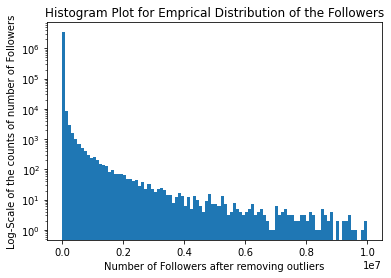

In [20]:
df_followers.sort_values(by='followers',ascending=True)

df_followers1=df_followers[df_followers['followers']>0]

df_followers1=df_followers1[df_followers1['followers']<10000000]
plt.hist(df_followers1['followers'].values,bins=100,log=True)
plt.xlabel('Number of Followers after removing outliers')
plt.ylabel('Log-Scale of the counts of number of Followers')
plt.title('Histogram Plot for Emprical Distribution of the Followers')
print('The Mean of the distribution is {}'.format(df_followers1.describe().iloc[1].values[0]))
print('The Mode of the distribution is {}'.format(df_followers1['followers'].mode().values[0]))
print('The 25% quantile of the distribution is {}'.format(df_followers1.describe().iloc[4].values[0]))
print('The 50% quantile of the distribution is {}'.format(df_followers1.describe().iloc[5].values[0]))
print('The 75% quantile of the distribution is {}'.format(df_followers1.describe().iloc[6].values[0]))
 

##### Approach: Step-4
>#####    - In this I take a Logarithm of the Number of followers and use only those profiles which have number of followers greater than 1 to avoid negative logarithm values.
>#####    - I plot a Normalised histogram 
>#####    - I see that the Logarithm of the Number of followers follows a gaussian distribution.

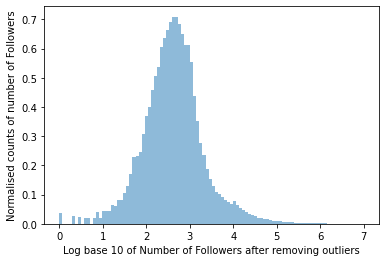

In [62]:
X=df_followers1[df_followers1['followers']>1]
plt.hist(np.log10(X),bins=100,density=True,alpha=0.5)
plt.xlabel('Log base 10 of Number of Followers after removing outliers')
plt.ylabel('Normalised counts of number of Followers')
plt.show()

##### Approach: Step-5
>#####    - I try to estimate the parameters of the gaussian distribution by computing the mean and variance of Log10( Number of followers)
>#####    - I estimate Probabiltiy distribution function using the obtained mean and variance parameters and generate pdf_y
>#####    - I plot a normalised histogram and the estimated gaussian distribution. It seems somewhat good fit.

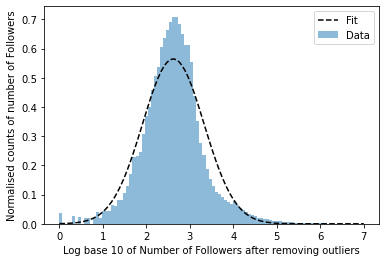

In [61]:
data=np.log10(X)
avg = np.mean(data)
var = np.var(data)

pdf_x = np.linspace(np.min(data),np.max(data),100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)


# Then we plot :
plt.figure()

plt.hist(data,100,alpha = 0.5,density=True)
plt.plot(pdf_x,pdf_y,'k--')
plt.xlabel('Log base 10 of Number of Followers after removing outliers')
plt.ylabel('Normalised counts of number of Followers')
plt.legend(("Fit","Data"))
plt.show()